In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
import keras

In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [40]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(768, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
#             torch.nn.ReLU(),
#             torch.nn.Linear(64, 36),
#             torch.nn.ReLU(),
#             torch.nn.Linear(36, 18),
#             torch.nn.ReLU(),
#             torch.nn.Linear(18, 9)
        )
         
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
#             torch.nn.Linear(9, 18),
#             torch.nn.ReLU(),
#             torch.nn.Linear(18, 36),
#             torch.nn.ReLU(),
#             torch.nn.Linear(36, 64),
#             torch.nn.ReLU(),
            torch.nn.Linear(128, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 768),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [41]:

# Model Initialization
model = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

In [42]:
DATA_train_PATH = "../data/embeddings/audio_trn_embeddings.pt"

In [43]:
data_train = torch.load(DATA_train_PATH)

In [44]:
loader = torch.utils.data.DataLoader(dataset = data_train["embeddings"],
                                     shuffle = True)

Text(0, 0.5, 'Loss')

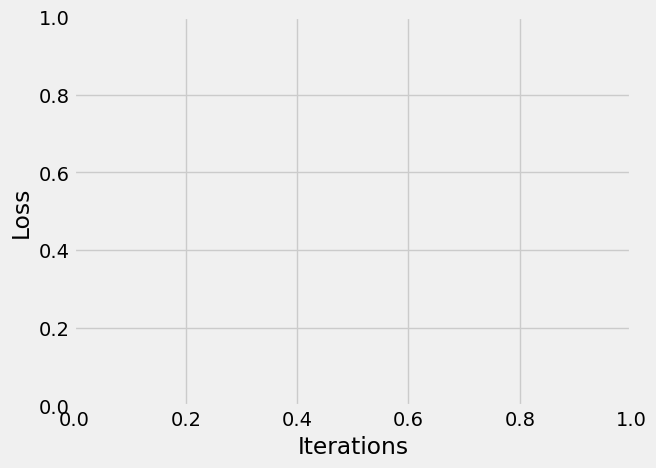

In [62]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
    for image in loader:
       
      # Reshaping the image to (-1, 784)
#       image = image.reshape(1, 786)
#        
      # Output of Autoencoder
      reconstructed = model(image)
       
      # Calculating the loss function
      loss = loss_function(reconstructed, image)
       
      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
       
      # Storing the losses in a list for plotting
      losses.append(loss)
    outputs.append((epochs, image, reconstructed))
 
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
# plt.plot(losses[-100:])

In [ ]:
fi_los = [losses.item() for fl in final_losses ]

In [71]:
loss_arr = []
for loss in losses:
    val = loss.detach().numpy()
    loss_arr.append(val)

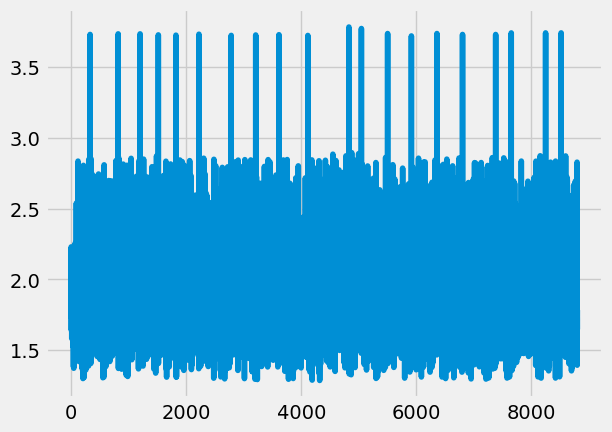

In [72]:
plt.plot(loss_arr)

In [69]:
import pandas as pd
losses_pd = pd.DataFrame()
# pd.DataFrame(x_trn.numpy())
for loss in losses:
    px = pd.DataFrame(loss.detach().numpy())
    losses_pd = pd.concat([losses_pd, px])

ValueError: Must pass 2-d input. shape=()

In [67]:
losses[0].detach().numpy()

array(1.9229727, dtype=float32)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

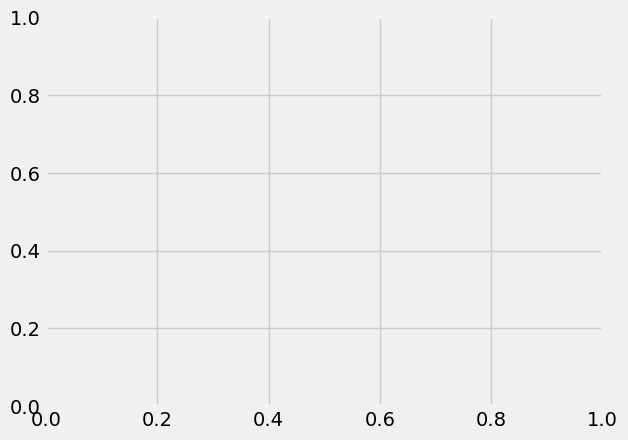

In [58]:
plt.plot(losses[-100:])

In [35]:
len(outputs)

20

In [22]:
for i, image in enumerate(loader):
    print(image.shape)
    if i == 2:
        break

torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])


In [48]:
projected_embed = []
for image in loader:
    enc_output = model.encoder(image)
    projected_embed.append(enc_output)

torch.Size([1, 128])